In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# EDA


In [3]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Numerical Features

These are features with a wide range of continuous or large discrete values that you can measure.

price

area

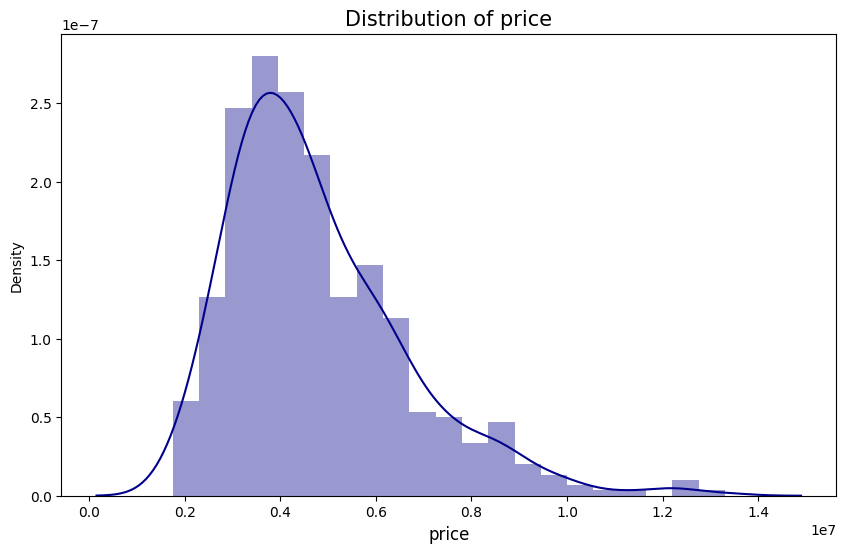

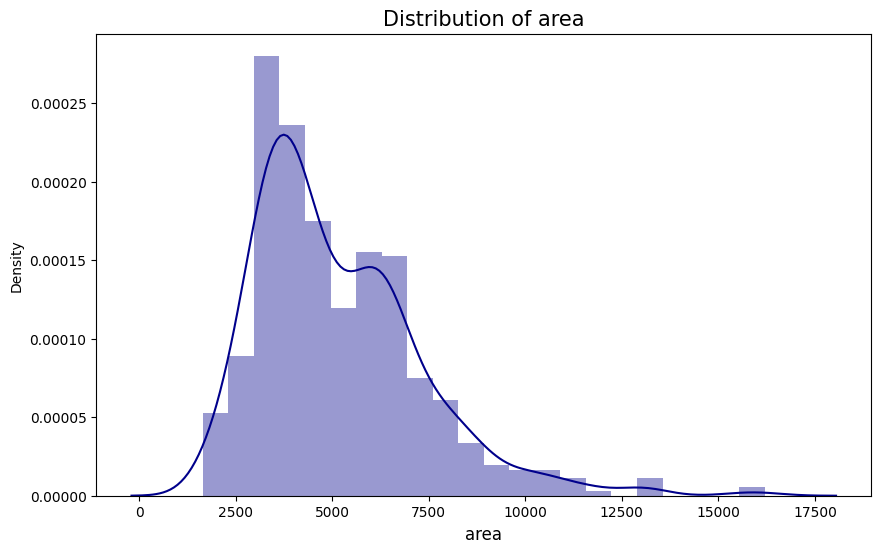

In [18]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
numerical_features = ['price', 'area']
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col], color= 'darkblue')
    plt.title(f'Distribution of {col}', fontsize = 15)
    plt.xlabel(col, fontsize = 12)

## analysing distplot

* If the plot looked like a perfect, symmetrical bell (a normal distribution), it would suggest very few or no outliers.

* When the plot is "stretched" to one side, it forms a long, thin tail. The data points that make up this tail are far away from the main cluster (the peak) of the data. These points are the outliers.


### Our plots:

* Price: The plot is not symmetrical. The main "hump" is on the left side, and a long, flat tail stretches far to the right.
This shape clearly indicates that while most houses have prices clustered in a lower range, there are a number of houses with significantly higher prices. These points in the long right tail are the outliers.


* Area: It is heavily right-skewed, with a large peak on the left and a long tail extending to the right. 
This means most properties have a similar area, but a few properties have a much larger area. These points in the tail are also outliers.

## Prove within boxplot:

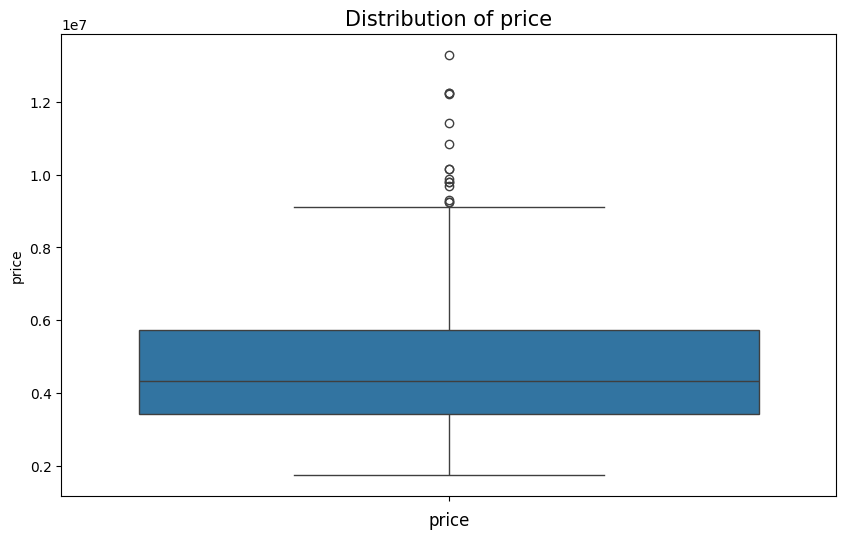

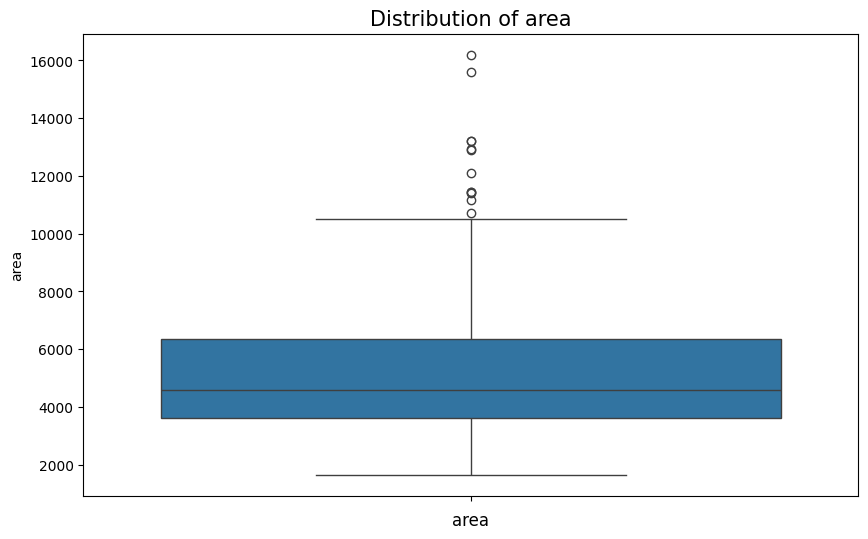

In [20]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
numerical_features = ['price', 'area']
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col}', fontsize = 15)
    plt.xlabel(col, fontsize = 12)

## Categorical Features
These features represent distinct groups or categories, even if some are stored as numbers.

bedrooms (Treated as categorical because it's a discrete count)

bathrooms (Discrete count)

stories (Discrete count)

parking (Discrete count)

mainroad (Binary: yes/no)

guestroom (Binary: yes/no)

basement (Binary: yes/no)

hotwaterheating (Binary: yes/no)

airconditioning (Binary: yes/no)

prefarea (Binary: yes/no)

furnishingstatus (Multiple categories: furnished, semi-furnished, unfurnished)

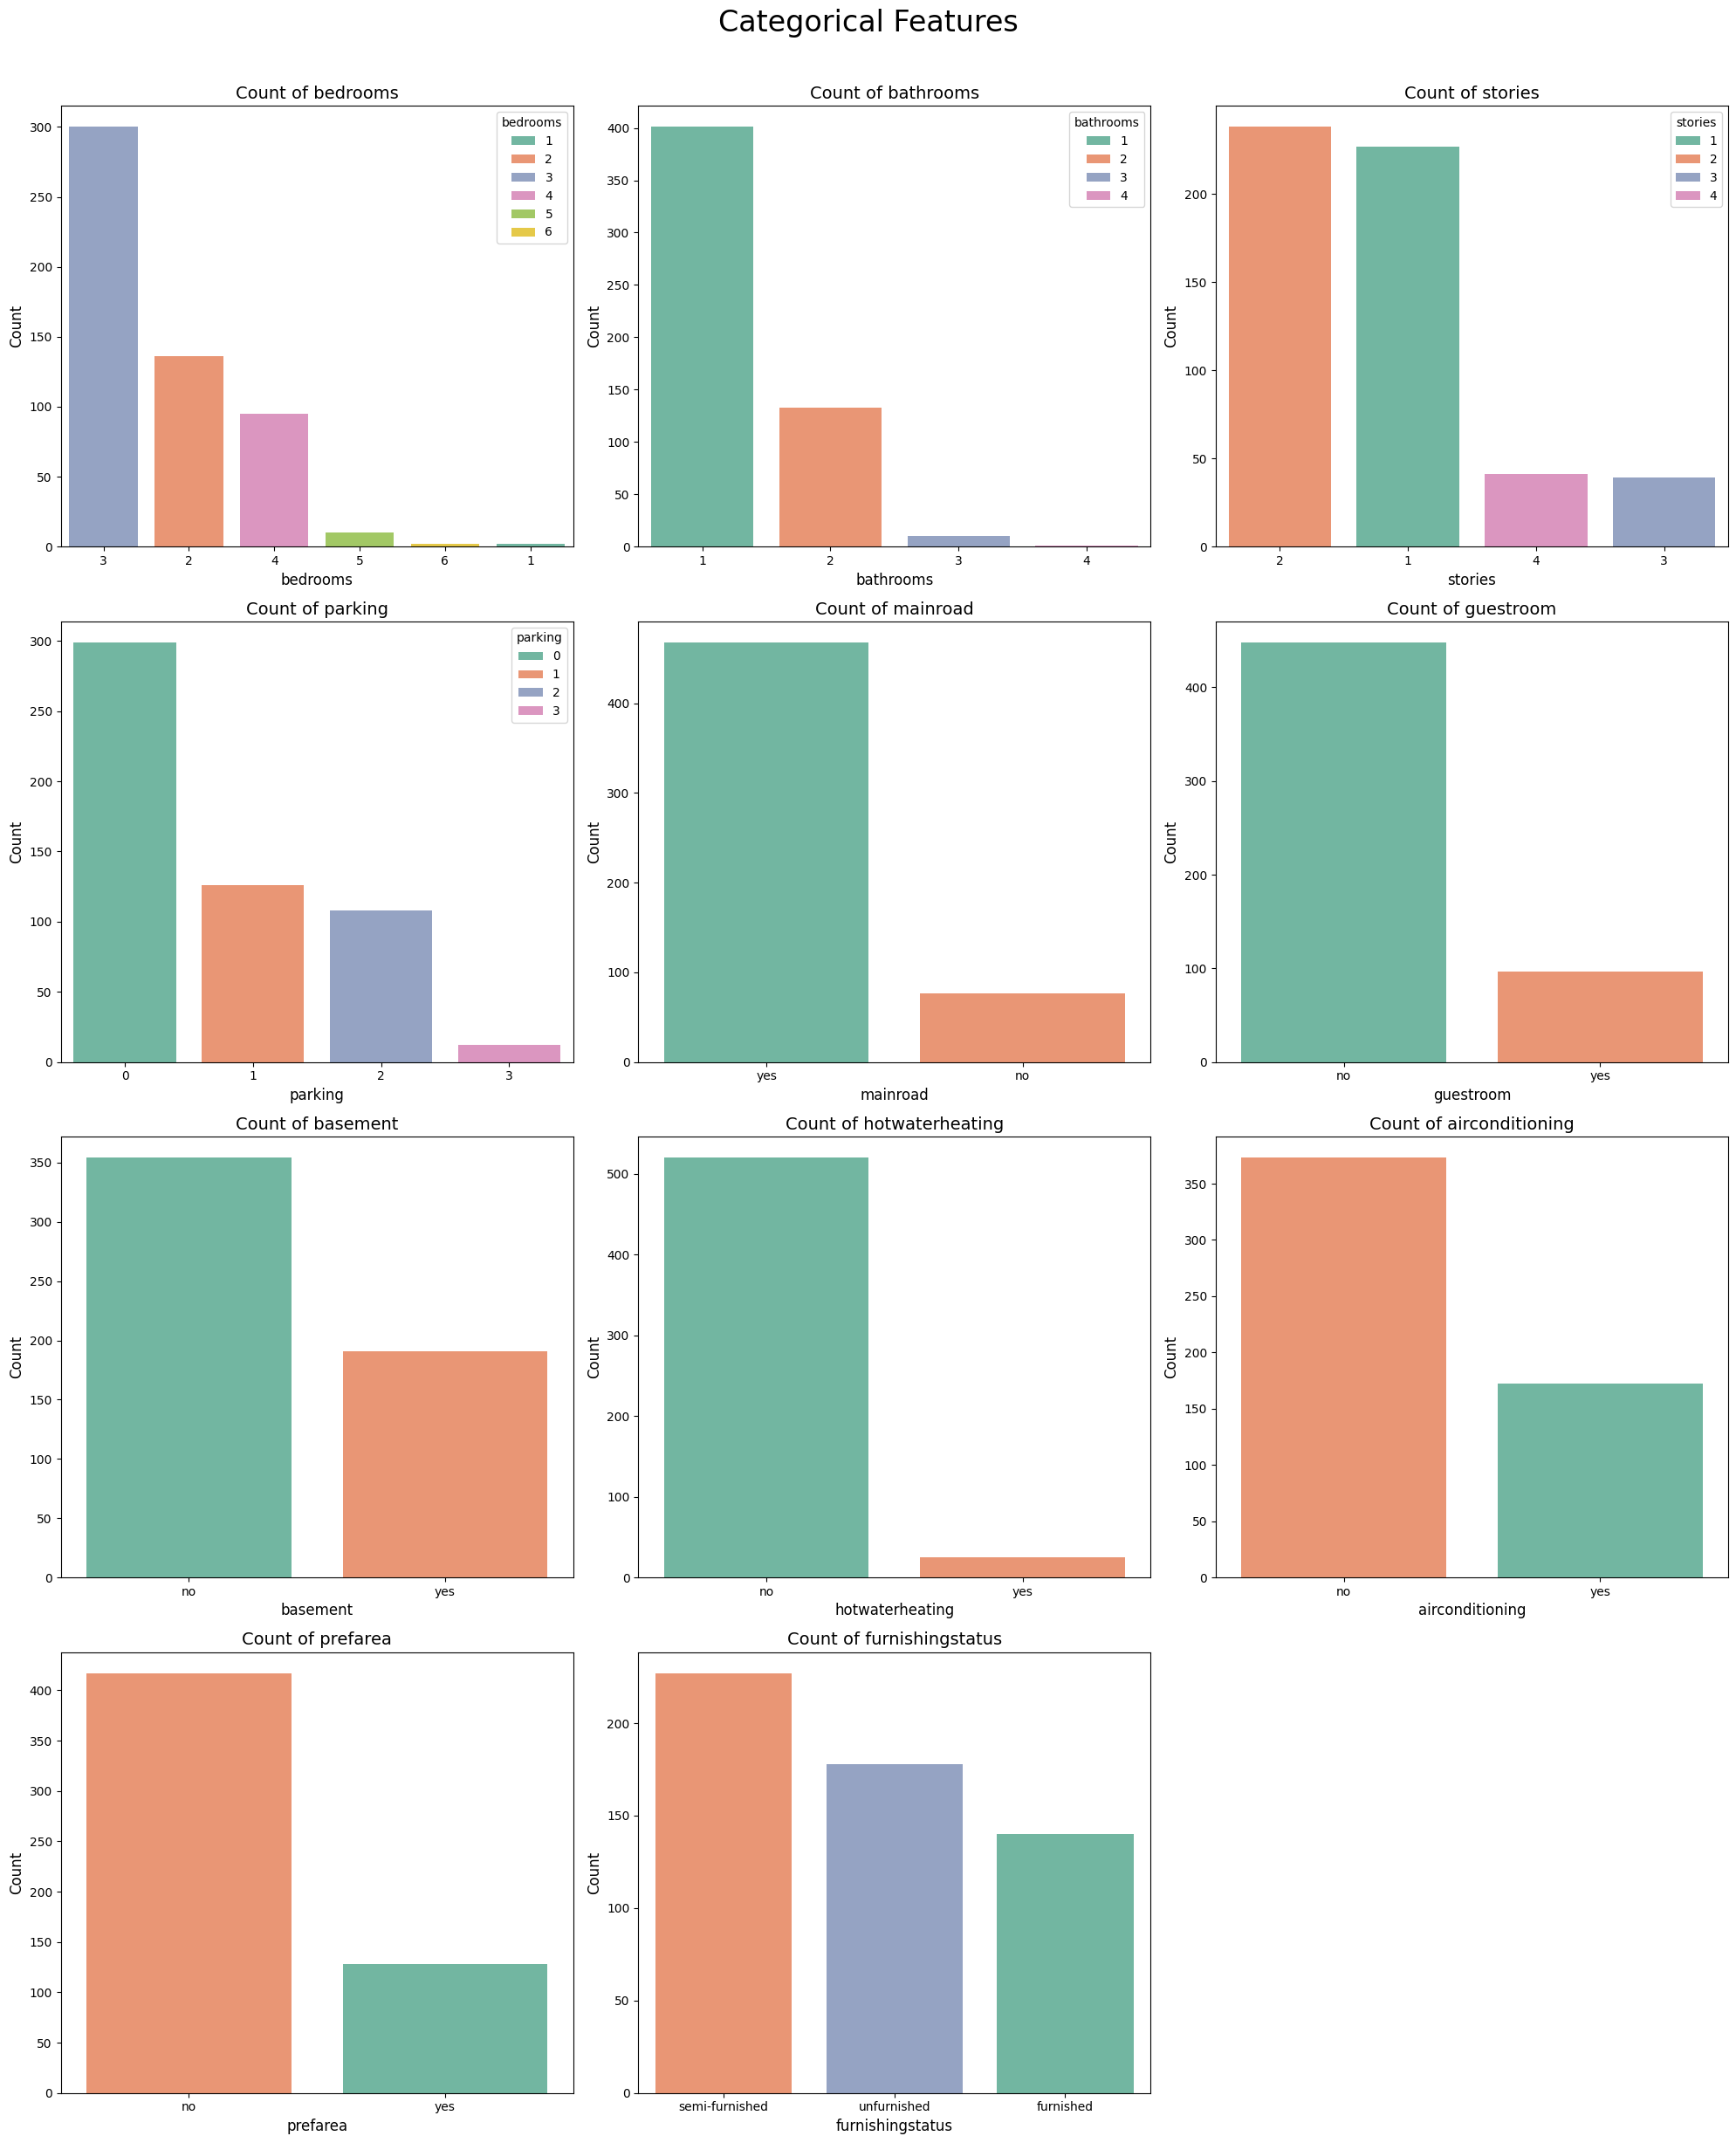

In [13]:
categorical_features = ['bedrooms', 'bathrooms','stories', 'parking','mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
import math
n_cols = 3
n_rows = math.ceil(len(categorical_features) / n_cols)
fig_cat, axes_cat = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 25))
fig_cat.suptitle('Categorical Features', fontsize=24, y=0.98)

axes_cat_flat = axes_cat.flatten()


for i, col in enumerate(categorical_features):
    sns.countplot(data = df, x = col, hue = col, order = df[col].value_counts().index, ax = axes_cat_flat[i], palette="Set2")
    axes_cat_flat[i].set_title(f'Count of {col}', fontsize=14)
    axes_cat_flat[i].set_xlabel(col, fontsize=12)
    axes_cat_flat[i].set_ylabel('Count', fontsize=12)
 
 
for i in range(len(categorical_features), len(axes_cat_flat)):
        axes_cat_flat[i].set_visible(False)   
plt.tight_layout(rect=[0, 0, 1, 0.97])


Text(0.5, 1.03, 'Pairplot of Important Features ')

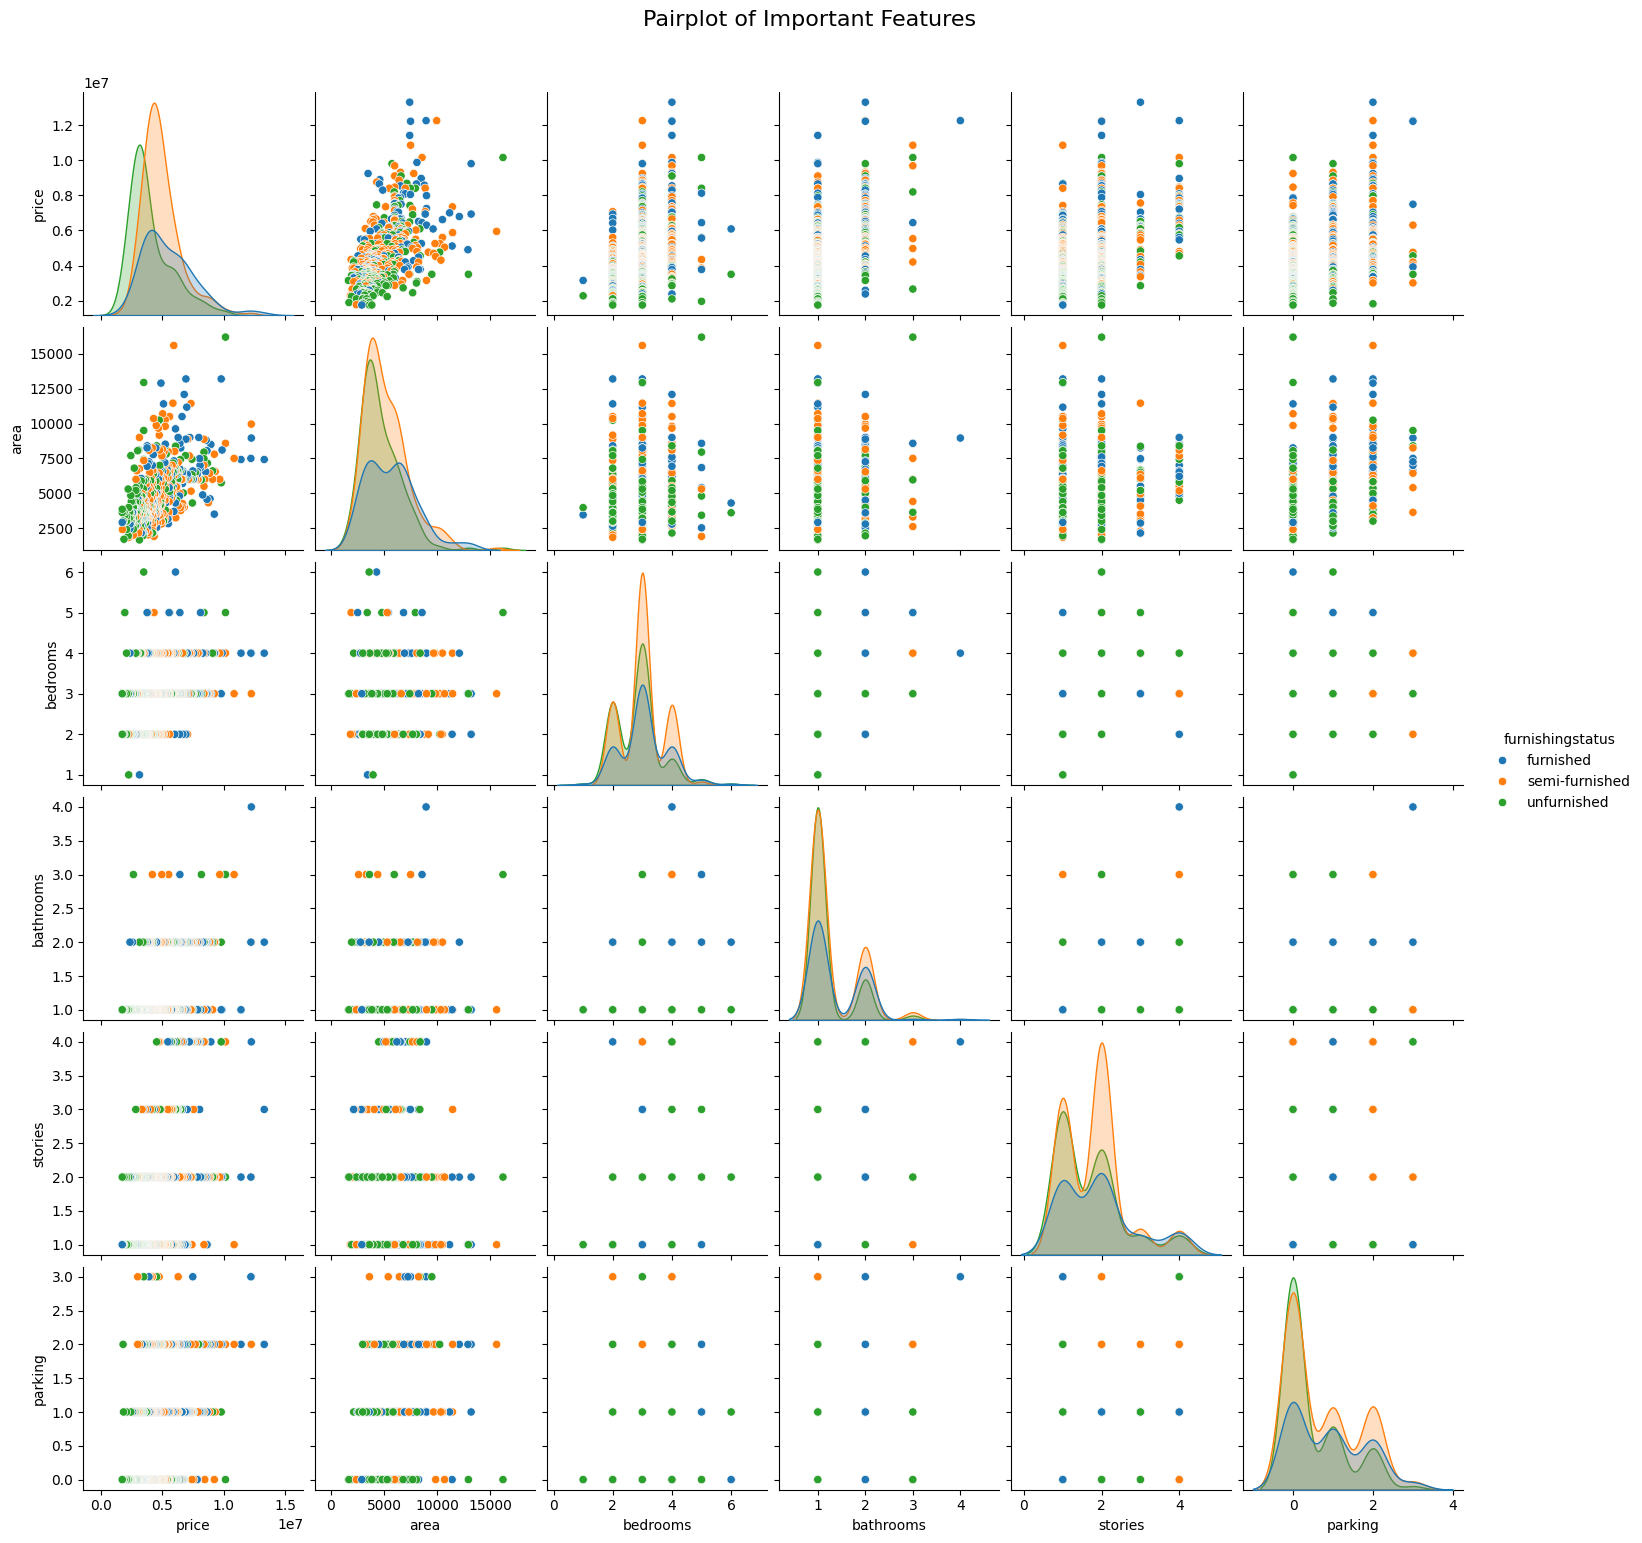

In [22]:
pirplot_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

pairplot = sns.pairplot(df, vars= pirplot_features, hue = 'furnishingstatus', diag_kind='kde')

pairplot.fig.suptitle('Pairplot of Important Features ', fontsize=16, y=1.03)


* Diagonal Plots: These are Kernel Density Estimates (KDEs) showing the distribution of a single feature (price, area, etc.) for each of the three furnishingstatus categories.

* Off-Diagonal Plots: These are scatter plots showing the relationship between two different features. Each dot's color tells you its furnishing status.

Example analysis:

* Price vs. Area (Strong Positive Correlation): As area increases, price strongly tends to increase. The "unfurnished" (green) dots are clustered more towards the bottom-left (lower price, lower area), while the "furnished" (blue) and "semi-furnished" (orange) dots are spread across all price ranges, but notably make up the majority of the most expensive homes.

* parking vs. bedrooms: the dots are all over the place. Knowing the number of bedrooms tells you very little about the number of parking spots, and vice-versa. This is an example of two features with little to no correlation.


# preprocessing

### check for repeatative row:

In [166]:
df.shape

(545, 13)

In [167]:
duplicate_row = df.duplicated().sum()
duplicate_row

0

In [168]:
# in case there were any duplicated row
df_cleaned = df.drop_duplicates(inplace = False)
df_cleaned.shape

(545, 13)

## missing values data

In [169]:
df_cleaned.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## coding categorical features

- Binary Mapping (Label Encoding): For all the 'yes'/'no' columns:
    map yes to 1 and no to 0
    
- One-Hot Encoding: For columns with several categories like furnishingtatus:
    we create new columns.
    for example furnishingstatus will be replaced by three new column:

        
        - furnishing_semi_furnished
        - unfurnished

    and their values ill be weather 0 or 1; when both are 0 means it is furnished

In [170]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df_cleaned[col] = df_cleaned[col].map({'yes': 1, 'no': 0})

In [172]:
furnishing_ = pd.get_dummies(df_cleaned['furnishingstatus'], prefix='furnishing', drop_first=True)
furnishing_

,furnishing_semi-furnished,furnishing_unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
540,False,True
541,True,False
542,False,True
543,False,False


In [173]:
df_cleaned = pd.concat([df_cleaned, furnishing_.astype(int)], axis = 1) #True = 1 / False = 0


In [175]:
df_cleaned = df_cleaned.drop('furnishingstatus', axis = 1)
df_cleaned

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


### outlier detection

* we have checked this using distplot and boxplot, we have outlier for both area and price features. now i want to just remove them.

* IQR Method for quantifying outliers, remove data 

In [176]:
Q1_price = df_cleaned['price'].quantile(0.25)
Q3_price = df_cleaned['price'].quantile(0.75)

IQR_price = Q3_price - Q1_price
upper_bound_price = Q3_price + (1.3 * IQR_price)
lower_bound_price = 0
print(f"Q1 (25th percentile) for price: {Q1_price}")
print(f"Q3 (75th percentile) for price: {Q3_price}")
print(f"IQR for price: {IQR_price}")
print(f"Upper Bound for price: {upper_bound_price}")
print(f"Lower Bound for price: {lower_bound_price}")
price_outliers = df_cleaned[(df_cleaned['price'] > upper_bound_price) | (df_cleaned['price'] < lower_bound_price)]
print(f"\nFound {len(price_outliers)} outliers in 'price' (values above {upper_bound_price}).")

Q1 (25th percentile) for price: 3430000.0
Q3 (75th percentile) for price: 5740000.0
IQR for price: 2310000.0
Upper Bound for price: 8743000.0
Lower Bound for price: 0

Found 21 outliers in 'price' (values above 8743000.0).


In [177]:
Q1_area = df_cleaned['area'].quantile(0.25)
Q3_area = df_cleaned['area'].quantile(0.75)

IQR_area = Q3_area - Q1_area
upper_bound_area = Q3_area + (1.3 * IQR_area)
lower_bound_area = 0
print(f"Q1 (25th percentile) for area: {Q1_area}")
print(f"Q3 (75th percentile) for area: {Q3_area}")
print(f"IQR for area: {IQR_area}")
print(f"Upper Bound for area: {upper_bound_area}")
print(f"Lower Bound for area: {lower_bound_area}")
area_outliers = df_cleaned[(df_cleaned['area'] > upper_bound_area) | (df_cleaned['area'] < lower_bound_area)]
print(f"\nFound {len(area_outliers)} outliers in 'area' (values above {upper_bound_area}).")


Q1 (25th percentile) for area: 3600.0
Q3 (75th percentile) for area: 6360.0
IQR for area: 2760.0
Upper Bound for area: 9948.0
Lower Bound for area: 0

Found 19 outliers in 'area' (values above 9948.0).


In [178]:

total_outliers = df_cleaned[
    (df_cleaned['price'] > upper_bound_price) | (df_cleaned['price'] < lower_bound_price) |
    (df_cleaned['area'] > upper_bound_area) | (df_cleaned['area'] < lower_bound_area)
]
print(f"\nTotal unique rows with at least one outlier (in price OR area): {len(total_outliers)}")
# Total Unique = (Price Outliers) + (Area Outliers) - (Outliers in BOTH)


Total unique rows with at least one outlier (in price OR area): 37


Median (Q2): The exact middle value (the 50th percentile).

First Quartile (Q1): The median of the bottom half of the data (the 25th percentile).

Third Quartile (Q3): The median of the top half of the data (the 75th percentile).

The Interquartile Range (IQR) is simply the distance or range between the third and first quartiles.$$IQR = Q3 - Q1$$

normal data which is the middle 50% (the IQR, from Q1 to Q3).


* Build the Fences:
-  start at the top of the box (Q3) and add a "buffer" to it. This buffer is 1.5 * IQR.
-  lower fence is set 0 for both features as far as there is no outlier in lower bounds base on boxplots.




### handle outliers: removing

In [179]:
df_cleaned.shape

(545, 14)

In [180]:
df_removed = df_cleaned[~df_cleaned.index.isin(total_outliers.index)]
df_removed.shape

(508, 14)

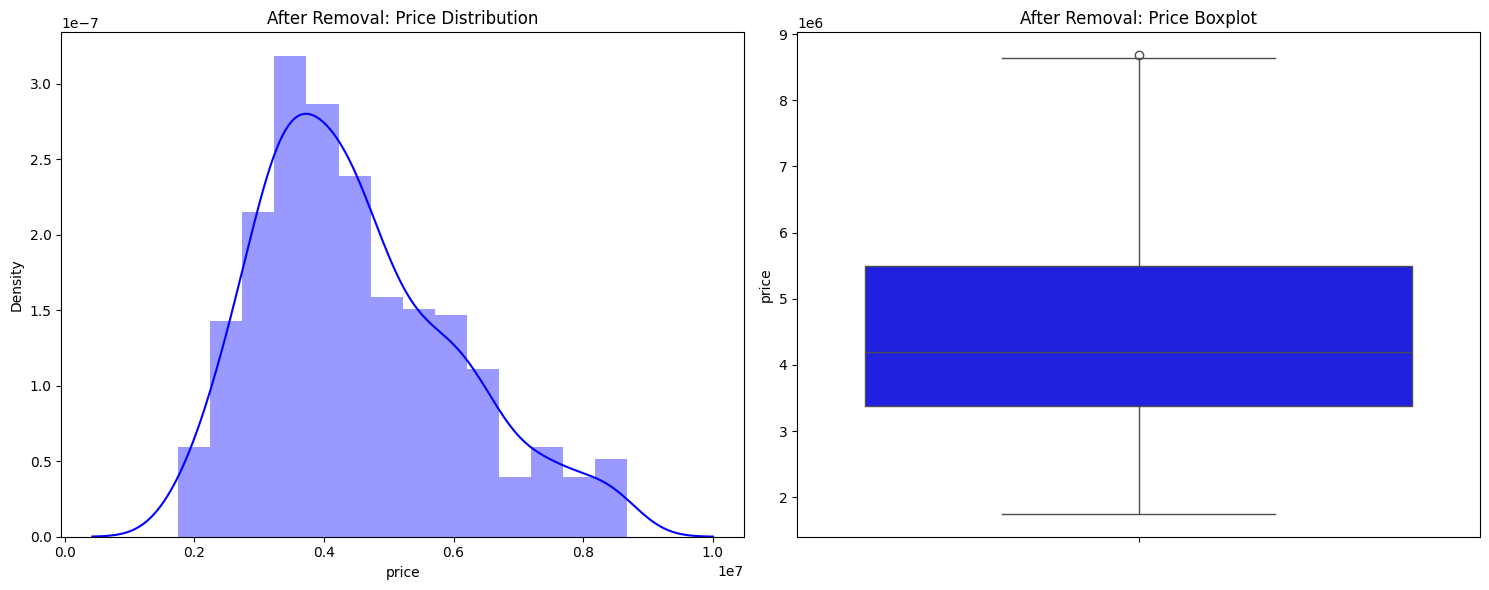

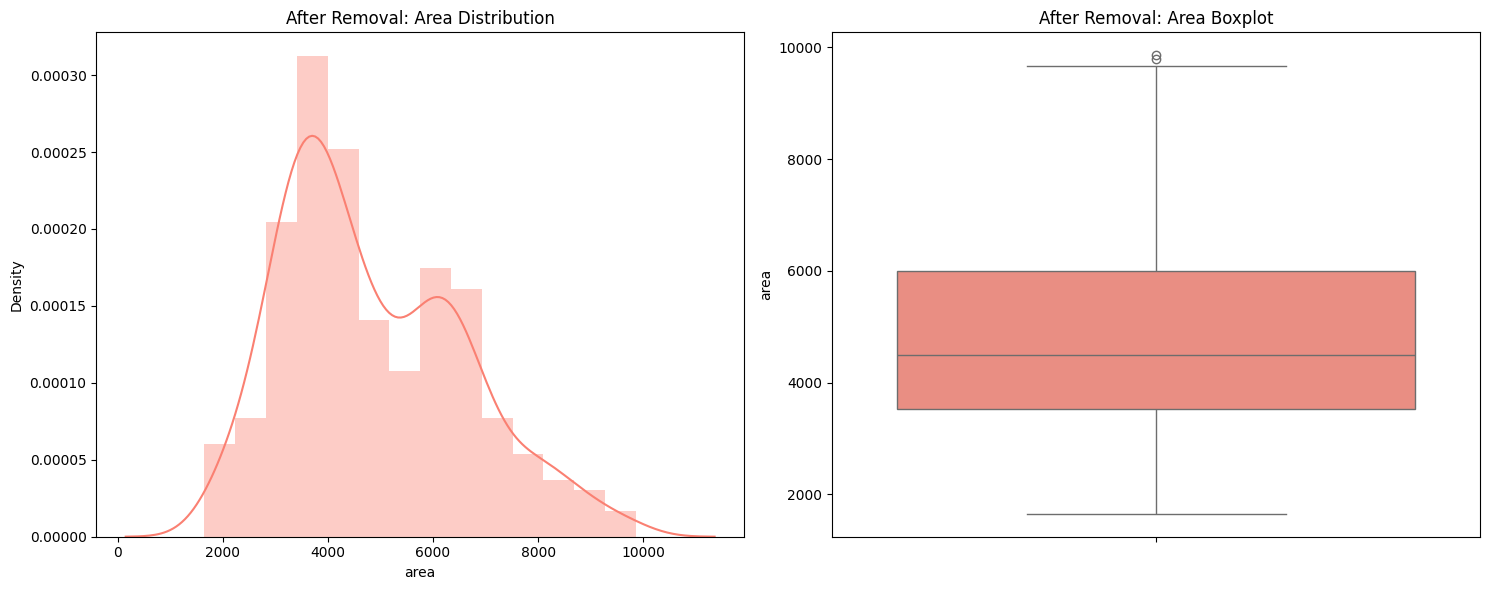

In [181]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df_removed['price'], color='blue')
plt.title('After Removal: Price Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_removed['price'], color='blue')
plt.title('After Removal: Price Boxplot')
plt.tight_layout()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df_removed['area'], color='salmon')
plt.title('After Removal: Area Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_removed['area'], color='salmon')
plt.title('After Removal: Area Boxplot')
plt.tight_layout()


### handle outliers: capping

In [182]:
# It sets values < lower_bound to lower_bound, and values > upper_bound to upper_bound
import numpy as np
df_capped = df_cleaned.copy()
df_capped['price'] = np.clip(df_capped['price'], lower_bound_price, upper_bound_price)
df_capped['area'] = np.clip(df_capped['area'], lower_bound_area, upper_bound_area)
df_capped.shape

(545, 14)

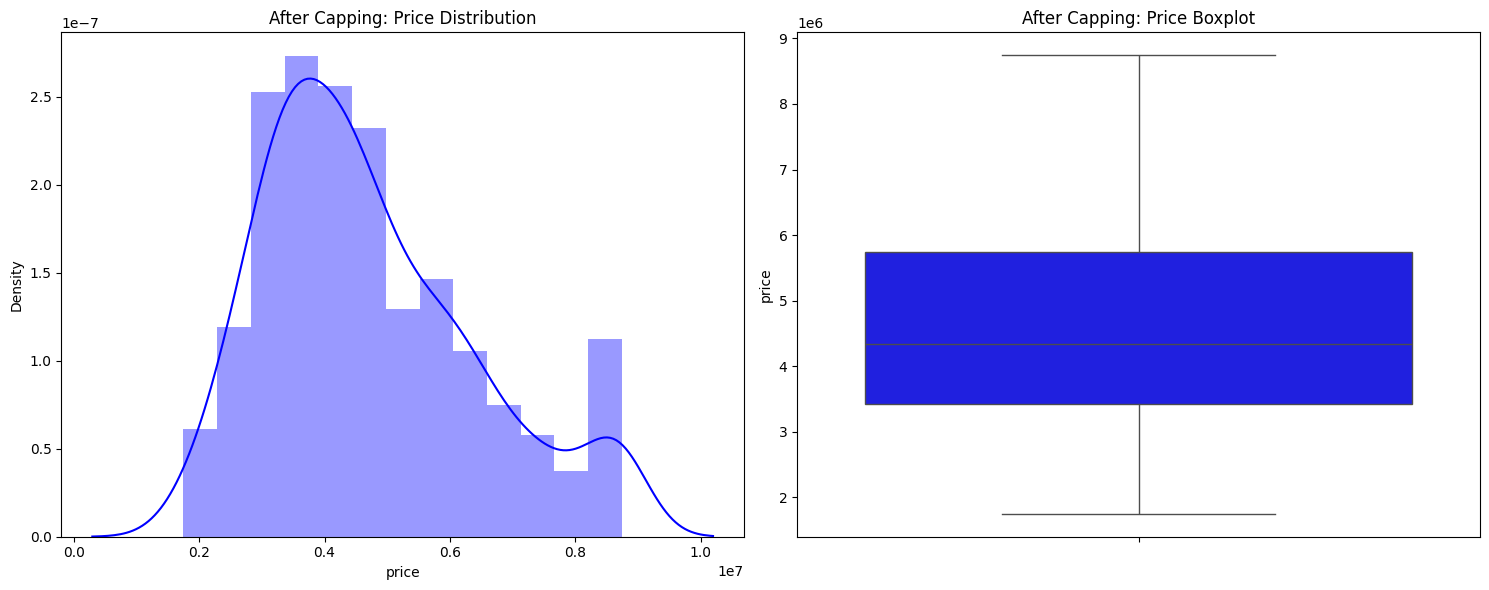

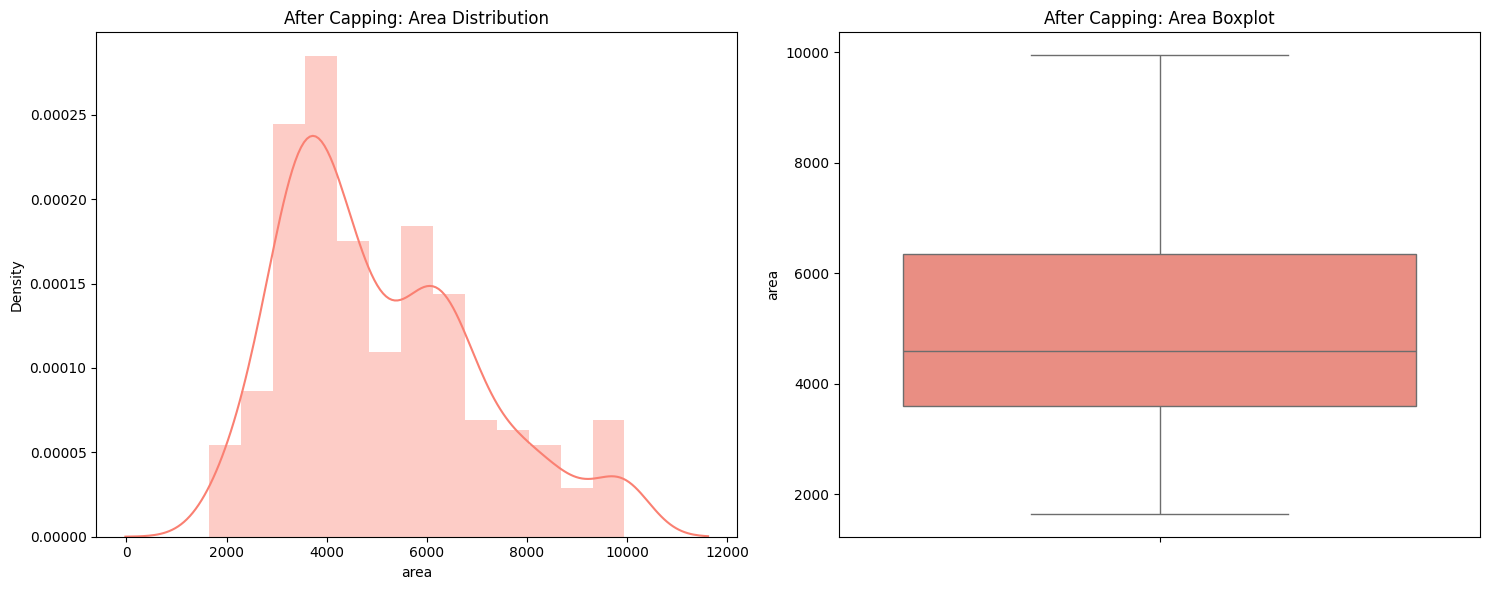

In [183]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df_capped['price'], color='blue')
plt.title('After Capping: Price Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_capped['price'], color='blue')
plt.title('After Capping: Price Boxplot')
plt.tight_layout()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df_capped['area'], color='salmon')
plt.title('After Capping: Area Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_capped['area'], color='salmon')
plt.title('After Capping: Area Boxplot')
plt.tight_layout()


### handle outliers: Log transformation

In [184]:
df_transformed = df_cleaned.copy()
df_transformed['price_log'] = np.log1p(df_transformed['price'])
df_transformed['area_log'] = np.log1p(df_transformed['area'])

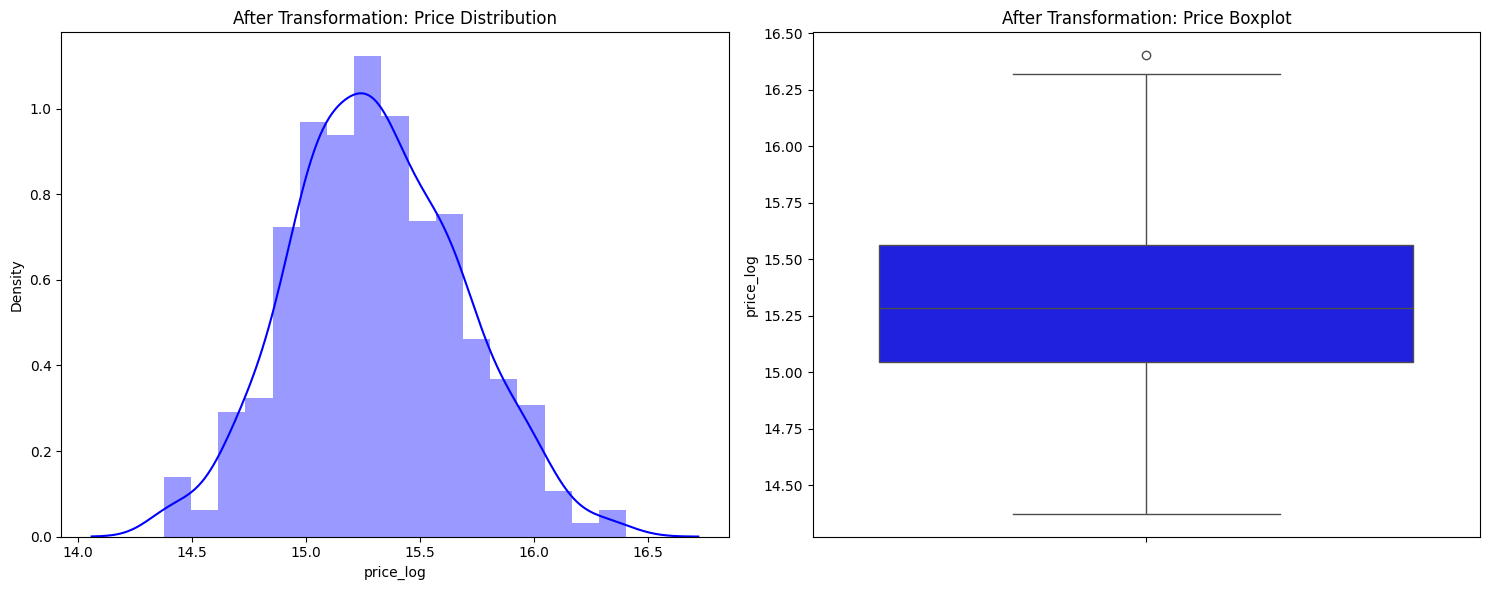

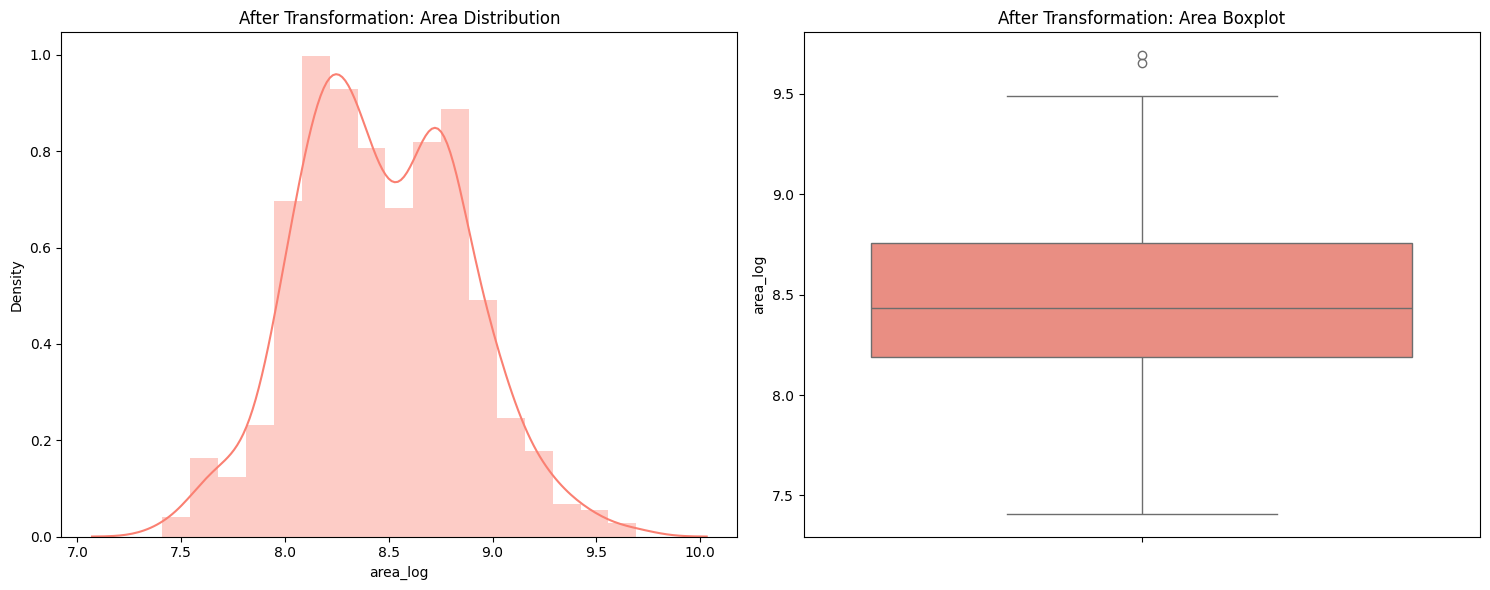

In [185]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df_transformed['price_log'], color='blue')
plt.title('After Transformation: Price Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_transformed['price_log'], color='blue')
plt.title('After Transformation: Price Boxplot')
plt.tight_layout()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df_transformed['area_log'], color='salmon')
plt.title('After Transformation: Area Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_transformed['area_log'], color='salmon')
plt.title('After Transformation: Area Boxplot')
plt.tight_layout()


Removal is a bad choice because it deletes this real, valuable information, biasing your model.
it is good for corrupted data for example price 10$ instead of 100982$

Capping preserve data but Creates an artificial "pile" of data at the cap value, which can slightly distort the model.

Log Transform is the best statistical choice. It correctly handles the natural skew of a feature like price

**however, in question we are asked to detect outliers and remove them; therefore i use df with removed outliers**

In [186]:
df_main = df_removed
df_main.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,0,1
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,0,0
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,0,0
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,0,0
25,8540000,6540,4,2,2,1,1,1,0,1,2,1,0,0


In [187]:
from sklearn.model_selection import train_test_split

y = df_main['price']
X = df_main.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (406, 13)
Testing features shape: (102, 13)
Training target shape: (406,)
Testing target shape: (102,)


## split 

## normalization

features need to be normalized: 
- Continuous Features: price and area.
- Count Features: bedrooms, bathrooms, stories, parking.

**we do not normalize binary label features because they are already on a perfect scale 0, 1**

* Min-Max scaler: It rescales every value in a column so it fits between 0 and 1. 

In [188]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = MinMaxScaler()

# Fit the scaler ONLY on the training data. This learns the min and max of just the training set.
scaler.fit(X_train[cols_to_scale])


MinMaxScaler()

In [189]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [190]:
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [191]:
X_test_scaled.head() 


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
105,0.347138,0.4,0.0,1.000000,1,0,0,0,1,0.000000,0,0,1
352,0.509135,0.2,0.0,0.000000,1,0,0,0,0,0.666667,0,0,1
522,0.100487,0.4,0.0,0.333333,1,0,0,0,0,0.000000,0,0,0
433,0.222899,0.6,0.0,0.333333,0,0,0,0,0,0.333333,0,1,0
200,0.349574,0.4,0.0,0.333333,1,0,1,0,1,0.000000,0,1,0


In [192]:
X_train_scaled.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_semi-furnished,furnishing_unfurnished
383,0.347138,0.6,0.5,0.333333,1,0,1,0,0,0.666667,0,0,0
167,0.359318,0.2,0.5,0.000000,1,0,0,0,1,0.666667,0,1,0
523,0.138490,0.6,0.5,0.333333,1,0,0,0,0,0.000000,0,0,0
488,0.432400,0.6,0.0,0.666667,1,0,0,0,0,0.000000,0,0,1
448,0.297808,0.2,0.0,0.000000,1,0,0,0,0,0.666667,0,1,0


## feature selection

In [193]:
def pearson_correlation(x,y):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    num = np.sum((x-mean_x) * (y - mean_y))
    den = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))

    if den == 0:
        return 0
    
    return num / den    

def corr(df):
    df = df.select_dtypes(include = [np.number])
    cols = df.columns
    n = len(cols)
    
    correlation_ = pd.DataFrame(np.zeros((n,n)), columns = cols, index = cols)
    for i in range(n):
        for j in range(n):
            correlation_.iloc[i,j] = pearson_correlation(df.iloc[:,i], df.iloc[:,j])
            
    return correlation_
    


In [194]:
df_train = pd.concat([X_train_scaled,y_train], axis = 1)
correlation = corr(df_train)

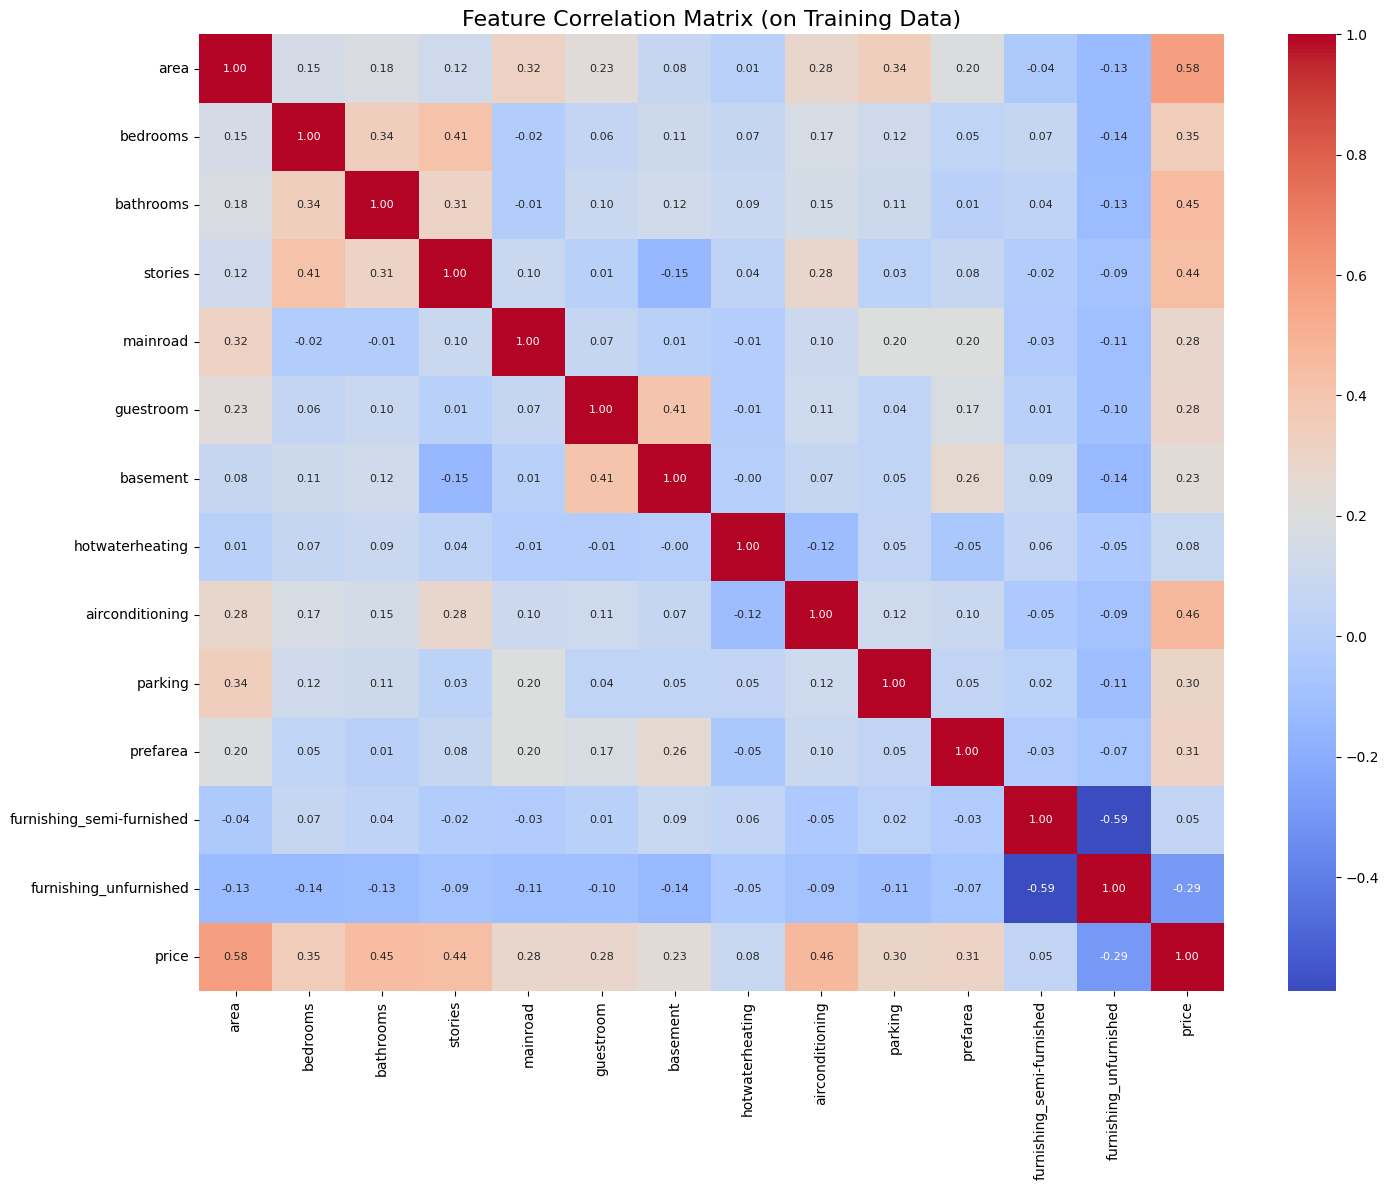

In [195]:
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation, 
    annot=True,          
    cmap='coolwarm',     
    fmt='.2f',           
    annot_kws={"size": 8} 
)
plt.title('Feature Correlation Matrix (on Training Data)', fontsize=16)
plt.tight_layout()

In [196]:
price_correlations = correlation['price'].sort_values(ascending=False)
    
print("\n--- Feature Correlations with Price (Training Data) ---")
print(price_correlations)


--- Feature Correlations with Price (Training Data) ---
price                        1.000000
area                         0.578406
airconditioning              0.464941
bathrooms                    0.450456
stories                      0.439658
bedrooms                     0.345647
prefarea                     0.309184
parking                      0.295026
guestroom                    0.284126
mainroad                     0.276601
basement                     0.232972
hotwaterheating              0.084425
furnishing_semi-furnished    0.054250
furnishing_unfurnished      -0.291423
Name: price, dtype: float64


### using PCA

In [197]:
from sklearn.decomposition import PCA 

pca = PCA()
pca.fit(X_train_scaled)

variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.23425018, 0.18005271, 0.13885476, 0.09594496, 0.07255695,
       0.06103219, 0.05370138, 0.04673831, 0.04409561, 0.02430908,
       0.02288292, 0.01682884, 0.00875211])

In [198]:
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance

array([0.23425018, 0.41430289, 0.55315765, 0.64910261, 0.72165956,
       0.78269175, 0.83639314, 0.88313144, 0.92722706, 0.95153613,
       0.97441905, 0.99124789, 1.        ])

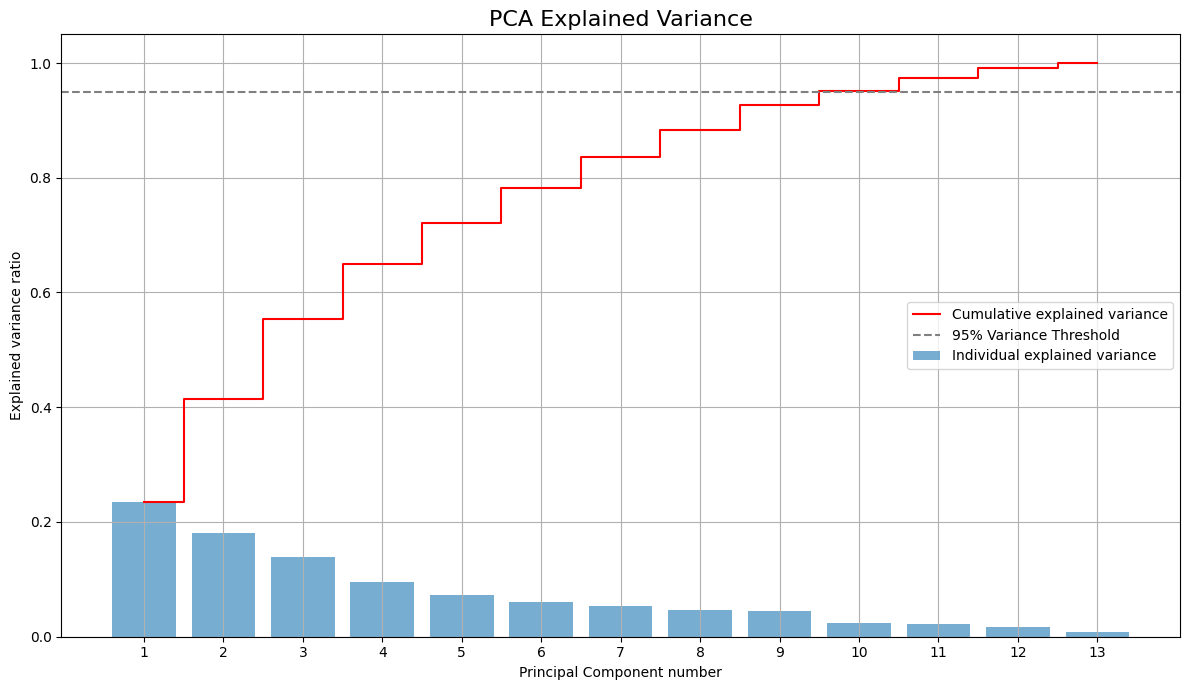

In [199]:
plt.figure(figsize=(12, 7))

plt.bar(range(1, len(variance_ratio) + 1), variance_ratio, alpha=0.6, align='center',
        label='Individual explained variance')
      
# Plot the cumulative explained variance
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
            label='Cumulative explained variance', color='red')
            
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component number')
plt.xticks(range(1, len(variance_ratio) + 1))
plt.title('PCA Explained Variance', fontsize=16)
plt.legend(loc='best')
plt.grid(True)

# Add a horizontal line for 95% threshold
plt.axhline(y=0.95, color='gray', linestyle='--', label = '95% Variance Threshold')
plt.legend(loc='best')

plt.tight_layout()

After pca our features are components 1 to 14

with 10 component we could get 95% of the information

therefore, our features are now component1 to component 10

In [200]:
pca = PCA(n_components=0.9, random_state=42)

pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [201]:
print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"New number of features (components): {X_train_pca.shape[1]}")


Original number of features: 13
New number of features (components): 9


In [202]:
pd.DataFrame(X_train_pca).head()

# now we cannot explain why a price is high; now we have no idea of what our data 
# is and we only keep trying to get the best result possible from the price prediction

,0,1,2,3,4,5,6,7,8
0,-0.143740,0.257959,-0.321635,-0.017343,-0.366029,-0.522305,-0.786814,0.160197,0.064958
1,-0.517634,-0.330897,0.761309,-0.183044,-0.072157,-0.315408,0.272089,0.065942,0.384695
2,0.267784,-0.328917,0.080486,0.155691,-0.238458,0.091774,-0.552022,-0.185211,-0.310333
3,0.900408,-0.087645,0.032407,0.134274,-0.120993,0.103774,-0.022571,0.327493,-0.368301
4,-0.337824,-0.764209,-0.014676,0.223999,-0.248465,-0.231023,0.214513,0.010749,0.381300


### VIF

VIF is a diagnostic tool used to detect multicollinearity in a set of features.

Multicollinearity occurs when one feature in your model can be predicted by one or more of the other features.

Imagine you have features for area_in_sq_feet and area_in_sq_meters. They describe the same thing and are perfectly correlated. This is an extreme case.

What if bedrooms + bathrooms is highly correlated with area? The model can't tell if price is high because of the area or because of the bedrooms and bathrooms.

It "inflates" the variance of the model's coefficients. This makes your model unstable and untrustworthy.

VIF = 1: No correlation. The feature is completely independent.

VIF > 1 and < 5: Moderate correlation. This is generally considered acceptable.

VIF > 5 (or > 10): High correlation. This is a problem. The feature should be investigated and likely removed.

In [203]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_vif = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif_data = vif_data[vif_data["feature"] != "const"]

In [204]:
print("VIF Scores (Initial Run):")
print(vif_data.sort_values(by="VIF", ascending=False))

VIF Scores (Initial Run):
                      feature       VIF
13     furnishing_unfurnished  1.671257
12  furnishing_semi-furnished  1.602964
4                     stories  1.453779
1                        area  1.413893
7                    basement  1.390359
2                    bedrooms  1.348110
6                   guestroom  1.267594
3                   bathrooms  1.239606
9             airconditioning  1.205148
5                    mainroad  1.187564
10                    parking  1.170503
11                   prefarea  1.158678
8             hotwaterheating  1.040600


all vif scores are below 5. This means our features are sufficiently independent, and i do not need to remove any features due to multicollinearity.

### RFE

RFE is a feature selection algorithm used to find the most predictive subset of features. It is not a diagnostic tool, but an automated method for creating a simpler, more "parsimonious" model.


RFE is a "backward elimination" process. You must provide it with two things:

An estimator (a model) that can assign importance to features (e.g., LinearRegression, RandomForest).

The number of features you want to end up with.


Step 1: It trains the model (e.g., LinearRegression) on all your features.

Step 2: It checks the importance of each feature (by looking at the coefficients in a linear model).

Step 3: It eliminates the single least important feature.

Step 4: It re-trains the model on the remaining features.

Step 5: It repeats this process until only your desired number of features are left.

The "Recursive" part is key: it re-trains the model at every step, which is much more accurate than just training once and dropping all the weak features.

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

rfe_results = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'is_selected': rfe.support_,
        'ranking': rfe.ranking_
    })

rfe_results = rfe_results.sort_values(by='ranking', ascending=True)
    
print("\nRFE Results (Top 7 features):")
print(rfe_results)

print("\nFinal features selected by RFE:")
print(rfe_results[rfe_results['is_selected'] == True]['feature'].tolist())


RFE Results (Top 7 features):
                      feature  is_selected  ranking
0                        area         True        1
2                   bathrooms         True        1
3                     stories         True        1
6                    basement         True        1
7             hotwaterheating         True        1
8             airconditioning         True        1
9                     parking         True        1
10                   prefarea         True        1
12     furnishing_unfurnished        False        2
1                    bedrooms        False        3
4                    mainroad        False        4
5                   guestroom        False        5
11  furnishing_semi-furnished        False        6

Final features selected by RFE:
['area', 'bathrooms', 'stories', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']


In [208]:
selected_features_rfe = [
    'area', 
    'bathrooms', 
    'stories', 
    'hotwaterheating', 
    'airconditioning', 
    'basement', 
    'parking',
    'prefarea'
]
X_train_rfe = X_train_scaled[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

now we have:
- X_train_pca , X_test_pca

- X_train_rfe, X_test_rfe

## Training 

In [234]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [214]:
def print_metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"--- {model_name} ---")
    print(f"R-squared ($R^2$): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:,.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}\n")
    return

### Linear Regression

**on features selected by pca**

In [215]:
lm_pca = LinearRegression()
lm_pca.fit(X_train_pca, y_train)

y_train_pred_pca = lm_pca.predict(X_train_pca)
y_test_pred_pca = lm_pca.predict(X_test_pca)


In [ ]:
print_metrics(y_train, y_train_pred_pca, "PCA (Training Data)")
print_metrics(y_test, y_test_pred_pca, "PCA (Test Data)")

--- Model 1: PCA (Training Data) ---
R-squared ($R^2$): 0.6297
Mean Absolute Error (MAE): 689,725.53
Root Mean Squared Error (RMSE): 912,757.67

--- Model 1: PCA (Test Data) ---
R-squared ($R^2$): 0.6440
Mean Absolute Error (MAE): 782,175.71
Root Mean Squared Error (RMSE): 991,992.43



**on features selected by rfe**

In [217]:
lm_rfe = LinearRegression()
lm_rfe.fit(X_train_rfe, y_train)

y_train_pred_rfe = lm_rfe.predict(X_train_rfe)
y_test_pred_rfe = lm_rfe.predict(X_test_rfe)

In [219]:
print_metrics(y_train, y_train_pred_rfe, "RFE (Training Data)")
print_metrics(y_test, y_test_pred_rfe, "RFE (Test Data)")

--- RFE (Training Data) ---
R-squared ($R^2$): 0.6568
Mean Absolute Error (MAE): 668,491.10
Root Mean Squared Error (RMSE): 878,802.16

--- RFE (Test Data) ---
R-squared ($R^2$): 0.6092
Mean Absolute Error (MAE): 826,698.35
Root Mean Squared Error (RMSE): 1,039,286.48



###  Regression Riⅾge

**on features selected by pca**

In [221]:
from sklearn.model_selection import GridSearchCV

ridge_pca = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
grid_pca = GridSearchCV(estimator=ridge_pca, param_grid=param_grid, cv=5, scoring='r2')
grid_pca.fit(X_train_pca, y_train)

best_lm_pca = grid_pca.best_estimator_
print(f"Best alpha for PCA model: {grid_pca.best_params_['alpha']}")


y_train_pred_pca = best_lm_pca.predict(X_train_pca)
y_test_pred_pca = best_lm_pca.predict(X_test_pca)

Best alpha for PCA model: 1.0


In [226]:
print_metrics(y_train, y_train_pred_pca, "Ridge + PCA (Training Data)")
print_metrics(y_test, y_test_pred_pca, "Ridge + PCA (Test Data)")

--- Ridge + PCA (Training Data) ---
R-squared ($R^2$): 0.6296
Mean Absolute Error (MAE): 689,478.31
Root Mean Squared Error (RMSE): 912,924.59

--- Ridge + PCA (Test Data) ---
R-squared ($R^2$): 0.6418
Mean Absolute Error (MAE): 783,782.69
Root Mean Squared Error (RMSE): 994,975.22



**on features selected by rfe**

In [223]:
ridge_rfe = Ridge()
grid_rfe = GridSearchCV(estimator=ridge_rfe, param_grid=param_grid, cv=5, scoring='r2')
grid_rfe.fit(X_train_rfe, y_train)

best_lm_rfe = grid_rfe.best_estimator_
print(f"Best alpha for RFE model: {grid_rfe.best_params_['alpha']}")

y_train_pred_rfe = best_lm_rfe.predict(X_train_rfe)
y_test_pred_rfe = best_lm_rfe.predict(X_test_rfe)

Best alpha for RFE model: 1.0


In [225]:
print_metrics(y_train, y_train_pred_rfe, "Ridge + RFE (Training Data)")
print_metrics(y_test, y_test_pred_rfe, "Ridge + RFE (Test Data)")

--- Ridge + RFE (Training Data) ---
R-squared ($R^2$): 0.6563
Mean Absolute Error (MAE): 668,854.65
Root Mean Squared Error (RMSE): 879,419.87

--- Ridge + RFE (Test Data) ---
R-squared ($R^2$): 0.6086
Mean Absolute Error (MAE): 829,199.18
Root Mean Squared Error (RMSE): 1,040,083.62



###  Regression Ⅼasso

**on features selected by pca**

In [228]:
lasso_pca = Lasso(max_iter=10000) # Increase max_iter for convergence
grid_pca = GridSearchCV(estimator=lasso_pca, param_grid=param_grid, cv=5, scoring='r2')
grid_pca.fit(X_train_pca, y_train)

best_lm_pca = grid_pca.best_estimator_
print(f"Best alpha for PCA model: {grid_pca.best_params_['alpha']}")

y_train_pred_pca = best_lm_pca.predict(X_train_pca)
y_test_pred_pca = best_lm_pca.predict(X_test_pca)

Best alpha for PCA model: 100.0


In [230]:
print_metrics(y_train, y_train_pred_pca, "Lasso + PCA (Training Data)")
print_metrics(y_test, y_test_pred_pca, "Lasso + PCA (Test Data)")

--- Lasso + PCA (Training Data) ---
R-squared ($R^2$): 0.6297
Mean Absolute Error (MAE): 689,689.20
Root Mean Squared Error (RMSE): 912,758.06

--- Lasso + PCA (Test Data) ---
R-squared ($R^2$): 0.6439
Mean Absolute Error (MAE): 782,259.63
Root Mean Squared Error (RMSE): 992,108.46



**on features selected by rfe**

In [229]:
lasso_rfe = Lasso(max_iter=10000)
grid_rfe = GridSearchCV(estimator=lasso_rfe, param_grid=param_grid, cv=5, scoring='r2')
grid_rfe.fit(X_train_rfe, y_train)

best_lm_rfe = grid_rfe.best_estimator_
print(f"Best alpha for RFE model: {grid_rfe.best_params_['alpha']}")

y_train_pred_rfe = best_lm_rfe.predict(X_train_rfe)
y_test_pred_rfe = best_lm_rfe.predict(X_test_rfe)

Best alpha for RFE model: 100.0


In [231]:
print_metrics(y_train, y_train_pred_rfe, "Lasso + RFE (Training Data)")
print_metrics(y_test, y_test_pred_rfe, "Lasso + RFE (Test Data)")

--- Lasso + RFE (Training Data) ---
R-squared ($R^2$): 0.6568
Mean Absolute Error (MAE): 668,478.40
Root Mean Squared Error (RMSE): 878,802.54

--- Lasso + RFE (Test Data) ---
R-squared ($R^2$): 0.6091
Mean Absolute Error (MAE): 826,775.71
Root Mean Squared Error (RMSE): 1,039,378.84



###  Regression Poⅼynoⅿiaⅼ

**on features selected by pca**

In [236]:
from sklearn.pipeline import Pipeline
param_grid = {'ridge__alpha': [0.1, 1.0, 10.0, 20.0]}
pipe_pca = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('ridge', Ridge())
    ])
    
grid_pca = GridSearchCV(estimator=pipe_pca, param_grid=param_grid, cv=5, scoring='r2')
grid_pca.fit(X_train_pca, y_train)

best_lm_pca = grid_pca.best_estimator_
print(f"Best alpha for PCA model: {grid_pca.best_params_['ridge__alpha']}")

Best alpha for PCA model: 10.0


In [237]:
y_train_pred_pca = best_lm_pca.predict(X_train_pca)
y_test_pred_pca = best_lm_pca.predict(X_test_pca)

print_metrics(y_train, y_train_pred_pca, "Polynomial + PCA (Training Data)")
print_metrics(y_test, y_test_pred_pca, "Polynomial + PCA (Test Data)")

--- Polynomial + PCA (Training Data) ---
R-squared ($R^2$): 0.6529
Mean Absolute Error (MAE): 661,866.26
Root Mean Squared Error (RMSE): 883,740.79

--- Polynomial + PCA (Test Data) ---
R-squared ($R^2$): 0.6361
Mean Absolute Error (MAE): 794,966.16
Root Mean Squared Error (RMSE): 1,002,876.93



**on features selected by rfe**

In [238]:
pipe_rfe = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('ridge', Ridge())
    ])
    
grid_rfe = GridSearchCV(estimator=pipe_rfe, param_grid=param_grid, cv=5, scoring='r2')
grid_rfe.fit(X_train_rfe, y_train)

best_lm_rfe = grid_rfe.best_estimator_
print(f"Best alpha for RFE model: {grid_rfe.best_params_['ridge__alpha']}")

y_train_pred_rfe = best_lm_rfe.predict(X_train_rfe)
y_test_pred_rfe = best_lm_rfe.predict(X_test_rfe)

Best alpha for RFE model: 1.0


In [239]:
print_metrics(y_train, y_train_pred_rfe, "Model 2: Polynomial + RFE (Training Data)")
print_metrics(y_test, y_test_pred_rfe, "Model 2: Polynomial + RFE (Test Data)")

--- Model 2: Polynomial + RFE (Training Data) ---
R-squared ($R^2$): 0.6864
Mean Absolute Error (MAE): 637,903.08
Root Mean Squared Error (RMSE): 839,995.56

--- Model 2: Polynomial + RFE (Test Data) ---
R-squared ($R^2$): 0.6298
Mean Absolute Error (MAE): 810,815.15
Root Mean Squared Error (RMSE): 1,011,557.91



###  MLP

In [241]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor
y_scaler = StandardScaler()
    

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

y_train_scaled = y_train_scaled.ravel()
y_test_scaled = y_test_scaled.ravel()

print("y data (target) scaled.")

mlp_params = {
    'hidden_layer_sizes': (50, 25),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.1,
    'max_iter': 1000,
    'early_stopping': True,
    'random_state': 42
}

y data (target) scaled.


**on features selected by pca**

In [242]:

mlp_pca = MLPRegressor(**mlp_params)
mlp_pca.fit(X_train_pca, y_train_scaled)

y_train_pred_scaled = mlp_pca.predict(X_train_pca)
y_test_pred_scaled = mlp_pca.predict(X_test_pca)

y_train_pred_pca = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
y_test_pred_pca = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

In [244]:
print_metrics(y_train, y_train_pred_pca, "MLP + PCA (Training Data)")
print_metrics(y_test, y_test_pred_pca, "MLP + PCA (Test Data)")

--- MLP + PCA (Training Data) ---
R-squared ($R^2$): 0.6300
Mean Absolute Error (MAE): 689,100.52
Root Mean Squared Error (RMSE): 912,456.09

--- MLP + PCA (Test Data) ---
R-squared ($R^2$): 0.6185
Mean Absolute Error (MAE): 795,282.69
Root Mean Squared Error (RMSE): 1,026,820.99



**on features selected by rfe**

In [243]:
mlp_rfe = MLPRegressor(**mlp_params)
mlp_rfe.fit(X_train_rfe, y_train_scaled)


y_train_pred_scaled = mlp_rfe.predict(X_train_rfe)
y_test_pred_scaled = mlp_rfe.predict(X_test_rfe)

y_train_pred_rfe = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
y_test_pred_rfe = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

In [245]:
print_metrics(y_train, y_train_pred_rfe, "MLP + RFE (Training Data)")
print_metrics(y_test, y_test_pred_rfe, "MLP + RFE (Test Data)")

--- MLP + RFE (Training Data) ---
R-squared ($R^2$): 0.6865
Mean Absolute Error (MAE): 628,376.69
Root Mean Squared Error (RMSE): 839,956.99

--- MLP + RFE (Test Data) ---
R-squared ($R^2$): 0.6247
Mean Absolute Error (MAE): 799,983.27
Root Mean Squared Error (RMSE): 1,018,450.37



### Regression Eⅼastiⅽ−Net

Elastic-Net is a regularized linear regression model that combines the penalties of both Ridge ($L2$) and Lasso ($L1$) regression.

Ridge ($L2$ Penalty): Shrinks coefficients, but never sets them to exactly zero. It's great at handling multicollinearity (highly correlated features), as it tends to shrink their coefficients together.Lasso ($L1$ Penalty): Performs feature selection by shrinking unimportant coefficients to exactly zero. Its weakness is that when faced with a group of highly correlated features, it tends to arbitrarily pick one and discard the others.

alpha: This is the overall strength of the regularization, just like in Ridge and Lasso.

- alpha = 0 is plain Linear Regression.

- alpha > 0 increases the penalty.

l1_ratio: This is the mix between the L1 and L2 penalties.

- l1_ratio = 1.0 means 100% $L1$ penalty (it's a Lasso model).
- l1_ratio = 0.0 means 100% $L2$ penalty (it's a Ridge model).
- l1_ratio = 0.5 means a 50/50 split, getting benefits from both.

By tuning both alpha and l1_ratio, Elastic-Net can find the perfect balance. It can perform feature selection (like Lasso) while also stabilizing the model and handling correlated features (like Ridge).

**on features selected by pca**

In [248]:
from sklearn.linear_model import LinearRegression, ElasticNet
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Overall strength
    'l1_ratio': [0.1, 0.5, 0.9]           # The mix (0.1=mostly Ridge, 0.9=mostly Lasso)
}


elastic_pca = ElasticNet(max_iter=10000, random_state=42)
grid_pca = GridSearchCV(estimator=elastic_pca, param_grid=param_grid, cv=5, scoring='r2')
grid_pca.fit(X_train_pca, y_train)

best_lm_pca = grid_pca.best_estimator_
print(f"Best params for PCA model: {grid_pca.best_params_}")

y_train_pred_pca = best_lm_pca.predict(X_train_pca)
y_test_pred_pca = best_lm_pca.predict(X_test_pca)

Best params for PCA model: {'alpha': 0.01, 'l1_ratio': 0.1}


In [250]:
print_metrics(y_train, y_train_pred_pca, "Elastic-Net + PCA (Training Data)")
print_metrics(y_test, y_test_pred_pca, "Elastic-Net + PCA (Test Data)")

--- Elastic-Net + PCA (Training Data) ---
R-squared ($R^2$): 0.6281
Mean Absolute Error (MAE): 690,356.11
Root Mean Squared Error (RMSE): 914,735.48

--- Elastic-Net + PCA (Test Data) ---
R-squared ($R^2$): 0.6356
Mean Absolute Error (MAE): 789,702.48
Root Mean Squared Error (RMSE): 1,003,532.53



**on features selected by rfe**

In [249]:
elastic_rfe = ElasticNet(max_iter=10000, random_state=42)
grid_rfe = GridSearchCV(estimator=elastic_rfe, param_grid=param_grid, cv=5, scoring='r2')
grid_rfe.fit(X_train_rfe, y_train)

best_lm_rfe = grid_rfe.best_estimator_
print(f"Best params for RFE model: {grid_rfe.best_params_}")

y_train_pred_rfe = best_lm_rfe.predict(X_train_rfe)
y_test_pred_rfe = best_lm_rfe.predict(X_test_rfe)

Best params for RFE model: {'alpha': 0.01, 'l1_ratio': 0.9}


In [251]:
print_metrics(y_train, y_train_pred_rfe, "Elastic-Net + RFE (Training Data)")
print_metrics(y_test, y_test_pred_rfe, "Elastic-Net + RFE (Test Data)")

--- Elastic-Net + RFE (Training Data) ---
R-squared ($R^2$): 0.6567
Mean Absolute Error (MAE): 668,530.89
Root Mean Squared Error (RMSE): 878,910.74

--- Elastic-Net + RFE (Test Data) ---
R-squared ($R^2$): 0.6091
Mean Absolute Error (MAE): 827,507.43
Root Mean Squared Error (RMSE): 1,039,449.91



### use mlp as feature extractor

In [254]:
from sklearn.base import BaseEstimator, TransformerMixin
class MLPFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, hidden_layer_sizes=(32, 16, 4), alpha=0.1, random_state=42):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.alpha = alpha
        self.random_state = random_state
        self.mlp_model_ = MLPRegressor(
            hidden_layer_sizes=self.hidden_layer_sizes,
            alpha=self.alpha,
            activation='relu',
            solver='adam',
            max_iter=1000,
            early_stopping=True,
            random_state=self.random_state
        )

    def fit(self, X, y):
        self.mlp_model_.fit(X, y)
        return self

    def transform(self, X):
        Z = X
        for i in range(len(self.mlp_model_.coefs_) - 1):
            Z = np.maximum(0, Z @ self.mlp_model_.coefs_[i] + self.mlp_model_.intercepts_[i])
        return Z

In [255]:
mlp_extractor = MLPFeatureExtractor(hidden_layer_sizes=(32, 16, 4), random_state=42)
    

mlp_extractor.fit(X_train_scaled, y_train_scaled)


X_train_new_features = mlp_extractor.transform(X_train_scaled)
X_test_new_features = mlp_extractor.transform(X_test_scaled)

print(f"New feature shape (Train): {X_train_new_features.shape}")
print(f"New feature shape (Test): {X_test_new_features.shape}")


print("Training the champion MLP model on the 4 new features...")

champion_mlp = MLPRegressor(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    alpha=0.1,
    max_iter=1000,
    early_stopping=True,
    random_state=42
)


champion_mlp.fit(X_train_new_features, y_train_scaled)

print("Validating the new model...")

y_train_pred_scaled = champion_mlp.predict(X_train_new_features)
y_test_pred_scaled = champion_mlp.predict(X_test_new_features)

y_train_pred_new = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
y_test_pred_new = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

New feature shape (Train): (406, 4)
New feature shape (Test): (102, 4)
Training the champion MLP model on the 4 new features...
Validating the new model...


In [256]:
print_metrics(y_train, y_train_pred_new, "MLP Extractor + Champion MLP (Training Data)")
print_metrics(y_test, y_test_pred_new, "MLP Extractor + Champion MLP (Test Data)")
    

--- MLP Extractor + Champion MLP (Training Data) ---
R-squared ($R^2$): 0.6440
Mean Absolute Error (MAE): 674,143.80
Root Mean Squared Error (RMSE): 895,013.31

--- MLP Extractor + Champion MLP (Test Data) ---
R-squared ($R^2$): 0.6171
Mean Absolute Error (MAE): 802,530.06
Root Mean Squared Error (RMSE): 1,028,773.24



This is a very informative result. This experiment shows us that over-compression can be harmful.

Information Loss: Our extractor model took all 13 input features and forced them through a "bottleneck" of only 4 neurons. In this process, some of the subtle and useful information that existed in the original 13 columns (or the 7 RFE-selected columns) was lost.

Insufficient Information: Our previous champion model (MLP + RFE) used 7 very clean and interpretable features (like area, bathrooms, airconditioning, etc.). These 7 features together provided enough information to build a strong model (R² = 67.2%).

Difference between RFE and the MLP Extractor:

RFE: eliminated the weak features and left the 7 original, strong features intact.

MLP Extractor: combined all 13 features and transformed them into 4 completely new, abstract features. These 4 new features, while optimized, could not contain all the richness of the 7 original RFE features.